## kosarak

EOF
Top-1024,Sketch:64*256
Execution time:  13.461 seconds.
Precision:  0.721
Top_dict with 119520 bytes.
Sketch with 65664 bytes.
Sk_head with 17008 bytes.
hyperloglog with 4784 bytes.
Total size 202.125 kbytes, 
Find:738
Top_ARE: 0.0808
Top_AAE: 4.2873
Estimate time:  0.796 seconds.


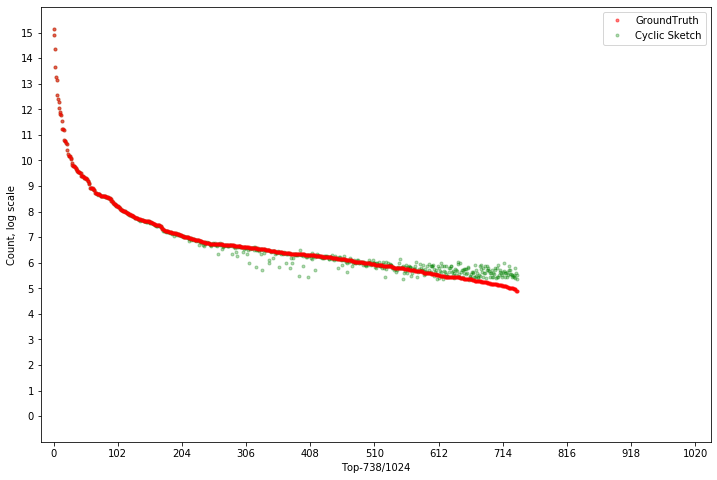

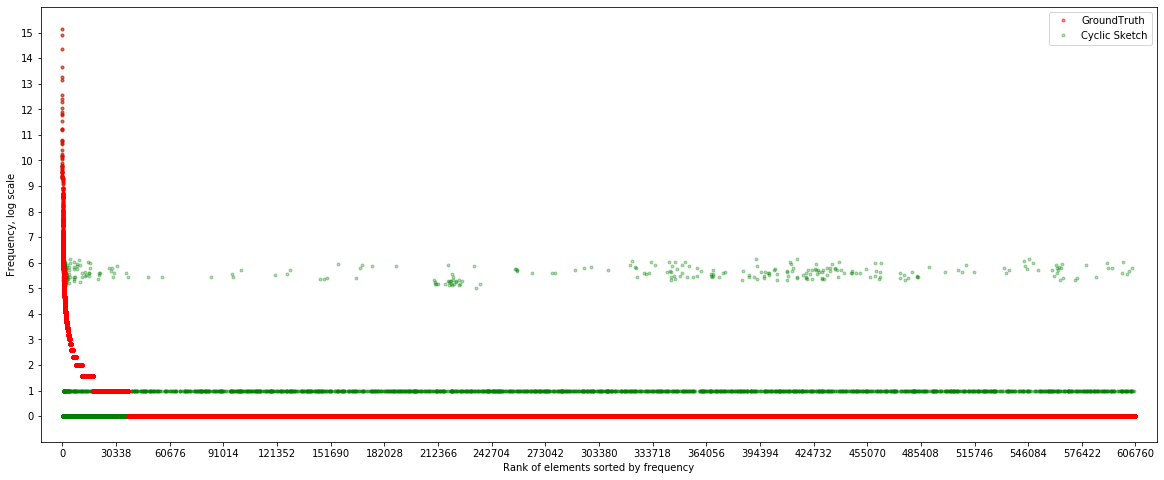

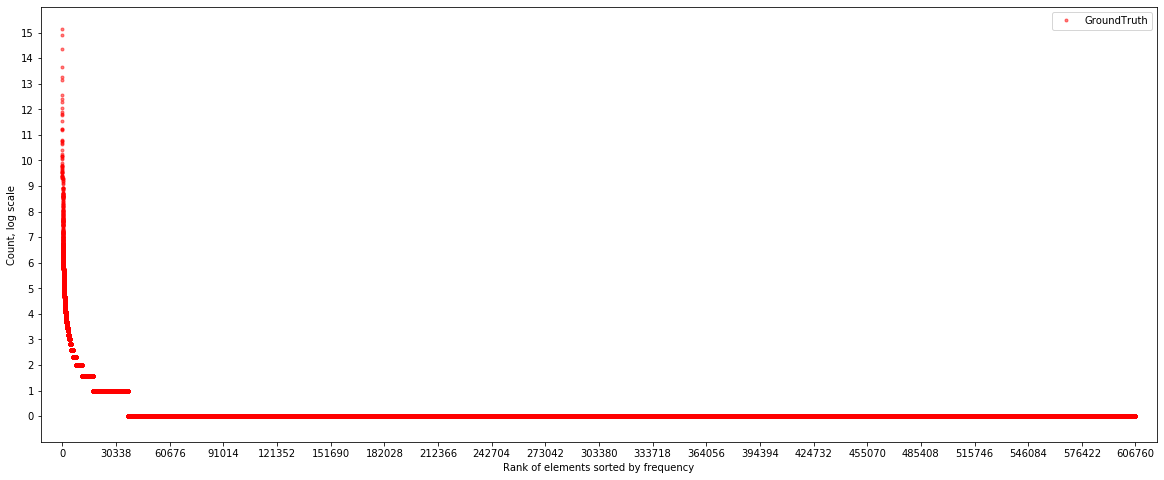

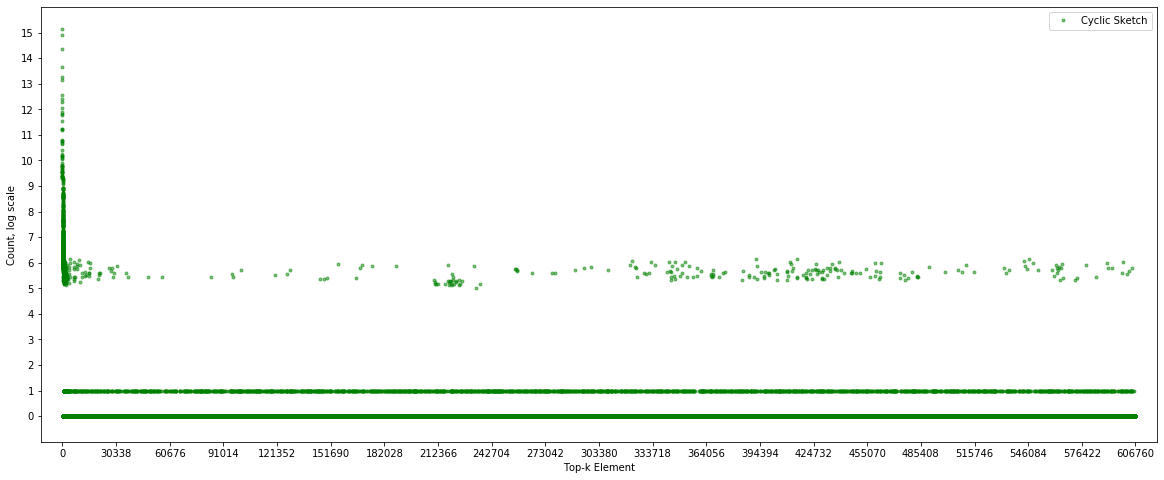

'\nprint(Sk_head)\nmin_ele = min(Top_dict, key=Top_dict.get)\n    # 找dict中的最小key元素\nprint(Top_dict[min_ele])\nfor i in range(len(Sk_head)):\n    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))\n\n\n# result to csv\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)\n\n# Top_dict to csv\nfilename=\'CS_Top_\'+str(size)+\'_kosarak\'+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n# Sketch to csv\nfilename=\'CS_Sketch_\'+str(TC.depth)+\'x\'+str(TC.width)+\'_kosarak\'+\'.csv\'\npd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))   \n'

In [2]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=12
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))


# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))   
'''


## Caida for flow

In [ ]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=256
size=2048
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
    

'''
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    

## caida for src ip

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:640*256
Execution time: 472.587 seconds.
Precision:  0.930
Top_dict with 138688 bytes.
Sketch with 655488 bytes.
Sk_head with 176016 bytes.
hyperloglog with 4816 bytes.
Total size 952.15625 kbytes, 
Find:952
Top_ARE: 0.0207
Top_AAE: 136.6943
Estimate time:  0.630 seconds.


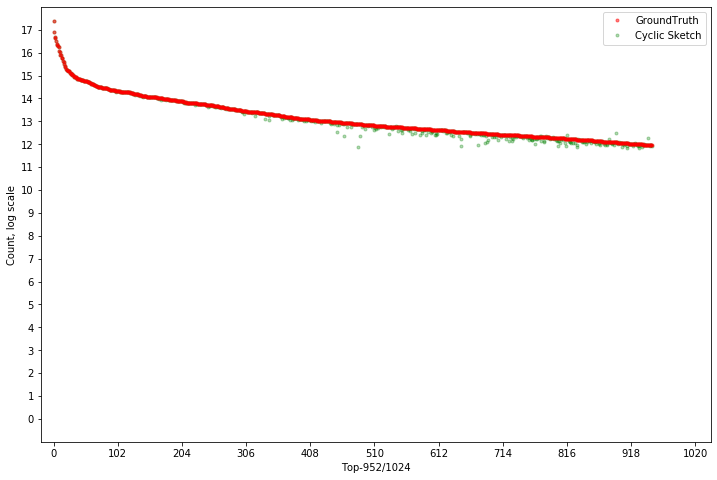

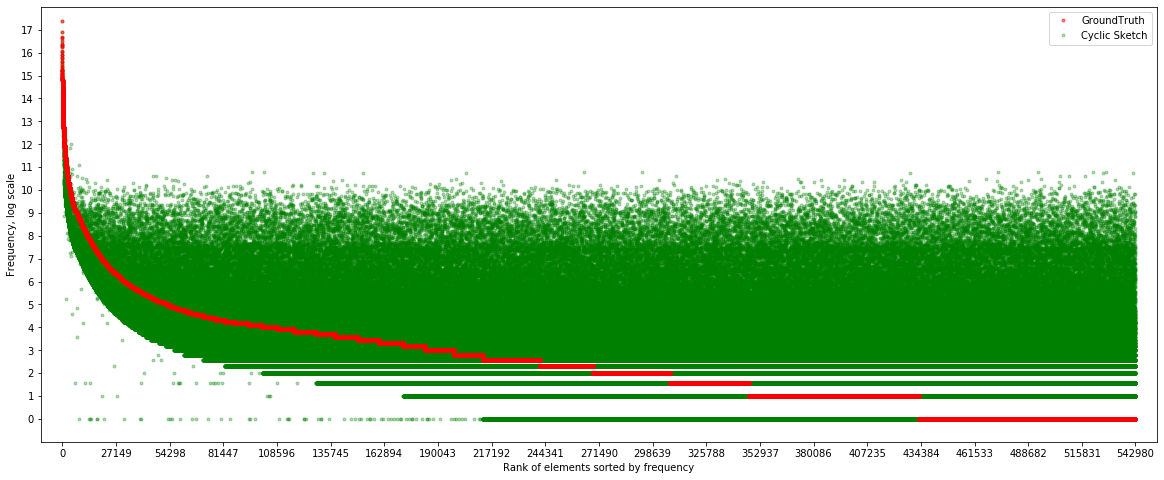

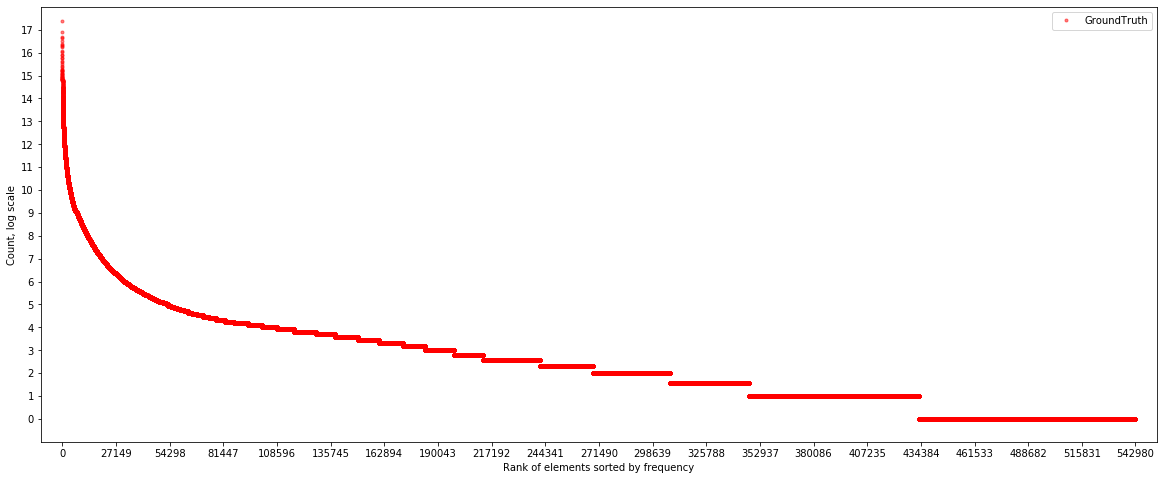

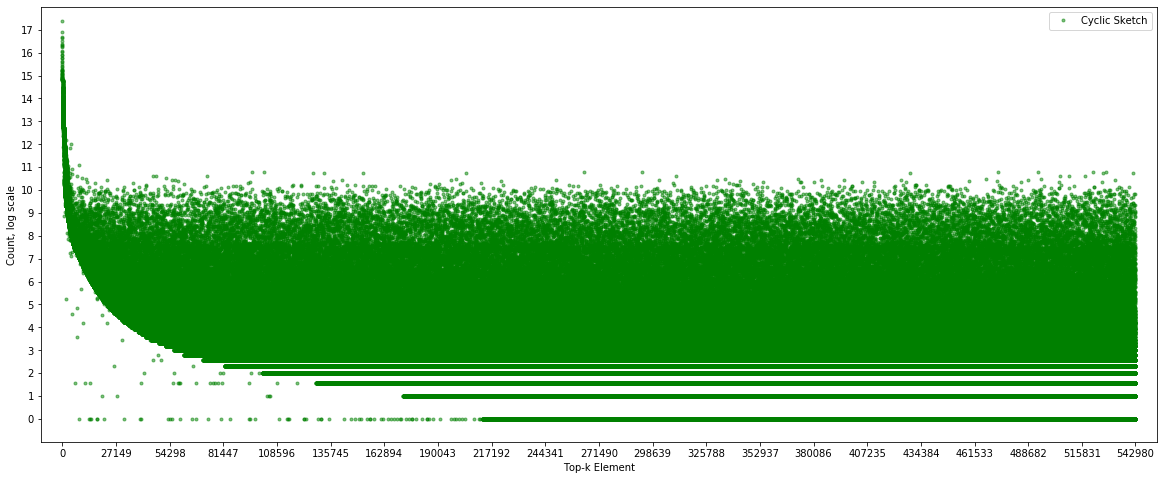

In [1]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=640
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    



In [ ]:
# all communications
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=64
d=256
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    
'''


In [ ]:
# result to csv
import pandas as pd

path=r"..\result\CS\caida"

# Top_dict to csv
filename='CS_Top_'+str(size)+'_caida'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_caida'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))

## webdocs

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:128*256
Execution time:2600.966 seconds.
Precision:  0.968
Top_dict with 127080 bytes.
Sketch with 131200 bytes.
Sk_head with 34208 bytes.
hyperloglog with 4848 bytes.
Total size 290.3671875 kbytes, 
Find:991
Top_ARE: 0.0014
Top_AAE: 93.6135
Estimate time:  3.730 seconds.


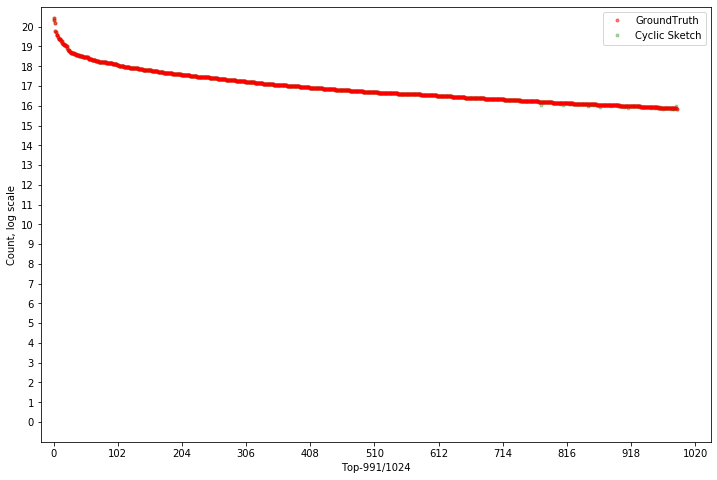

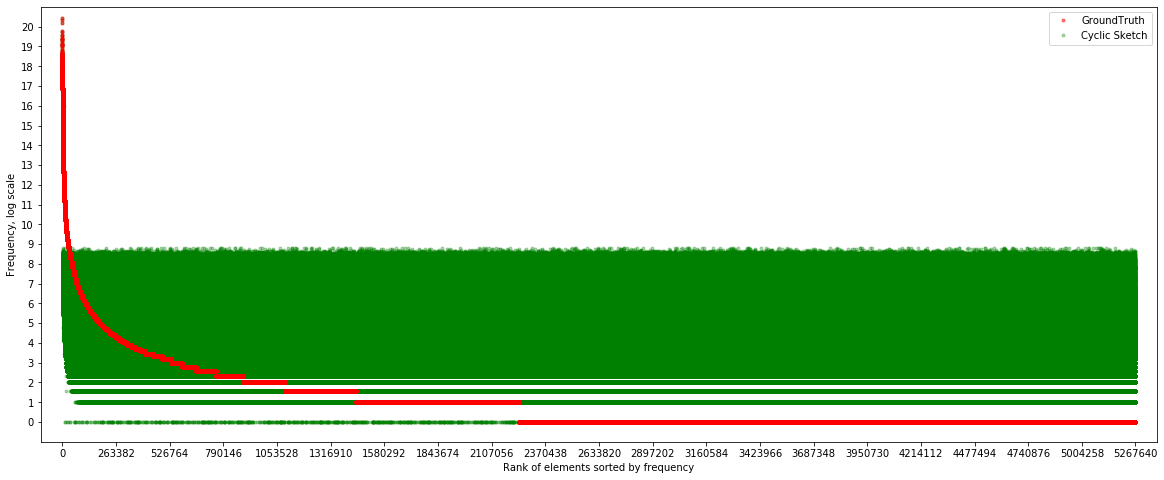

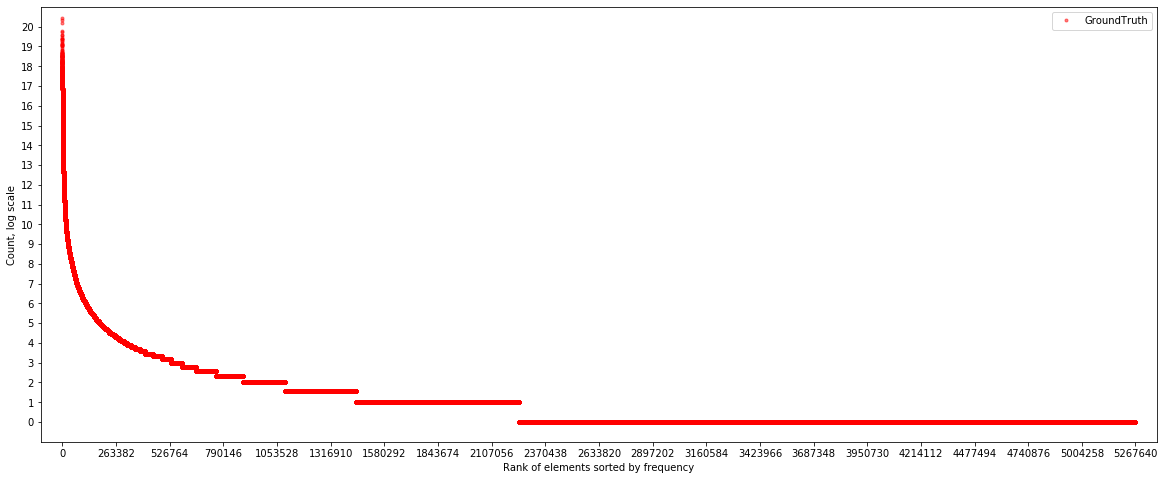

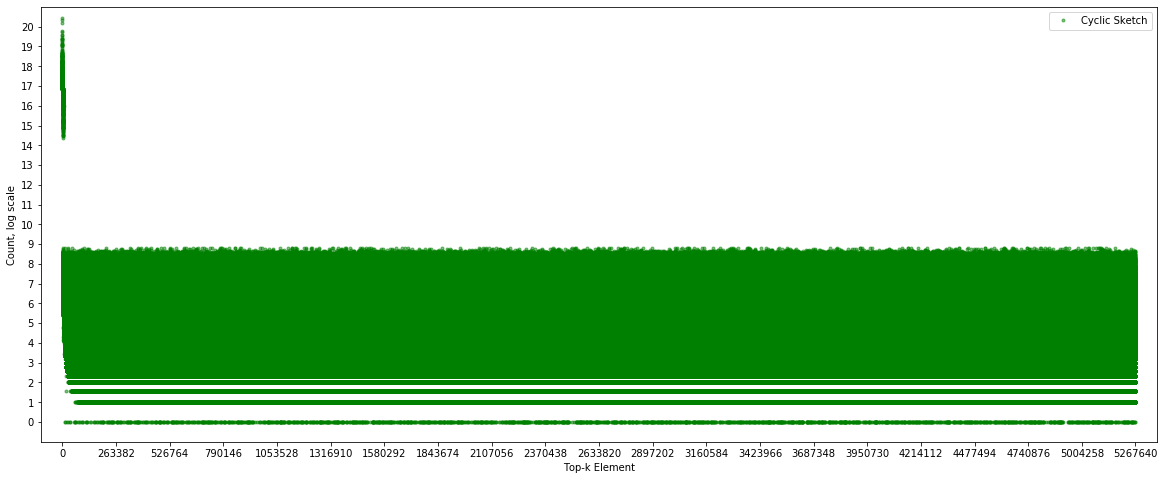

'\nprint(Sk_head)\nmin_ele = min(Top_dict, key=Top_dict.get)\n    # 找dict中的最小key元素\nprint(Top_dict[min_ele])\nfor i in range(len(Sk_head)):\n    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))\n    \n# result to csv\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)\n\n# Top_dict to csv\nfilename=\'CS_Top_\'+str(size)+\'_\'+dataset+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n# Sketch to csv\nfilename=\'CS_Sketch_\'+str(TC.depth)+\'x\'+str(TC.width)+\'_\'+dataset+\'.csv\'\npd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       \n'

In [1]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='webdocs'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       
'''    
    
 

EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:128*256
Execution time:2858.534 seconds.
Precision:  0.970
Top_dict with 127080 bytes.
Sketch with 131200 bytes.
Sk_head with 34208 bytes.
hyperloglog with 4848 bytes.
Total size 290.3671875 kbytes, 
Find:993
Top_ARE: 0.0017
Top_AAE: 113.4794
Estimate time:  4.242 seconds.


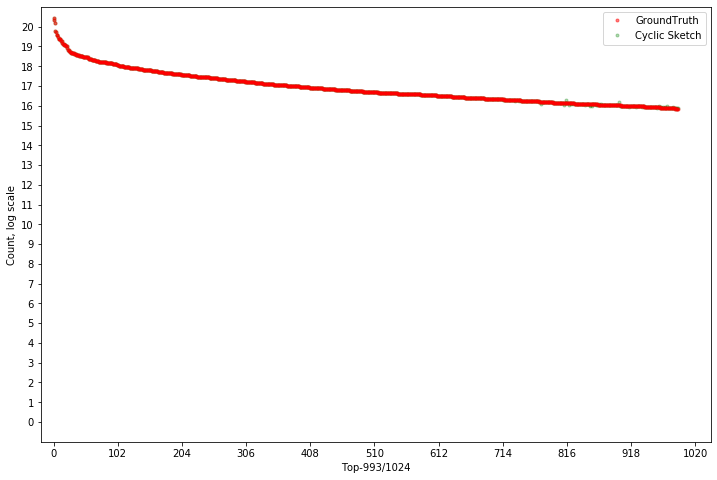

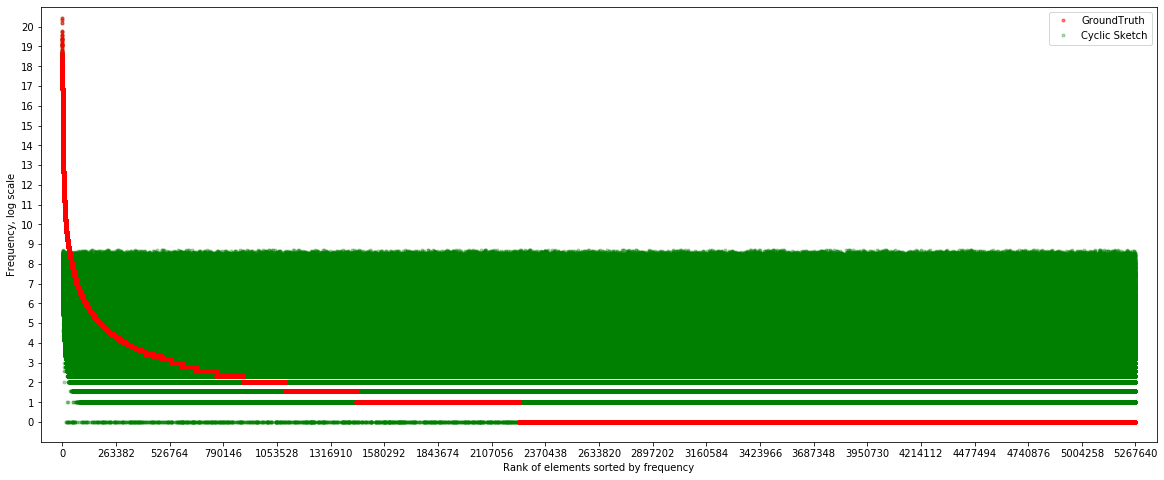

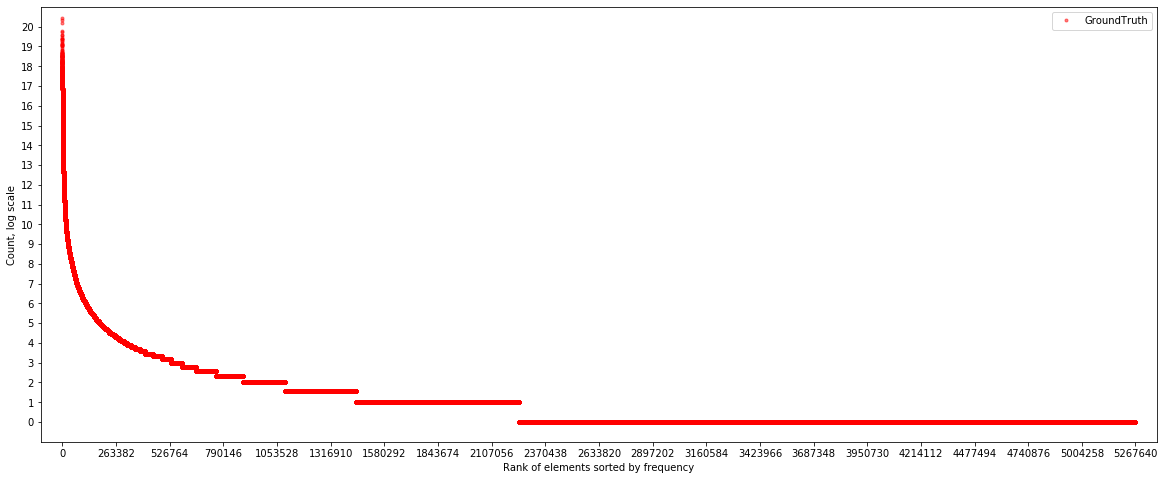

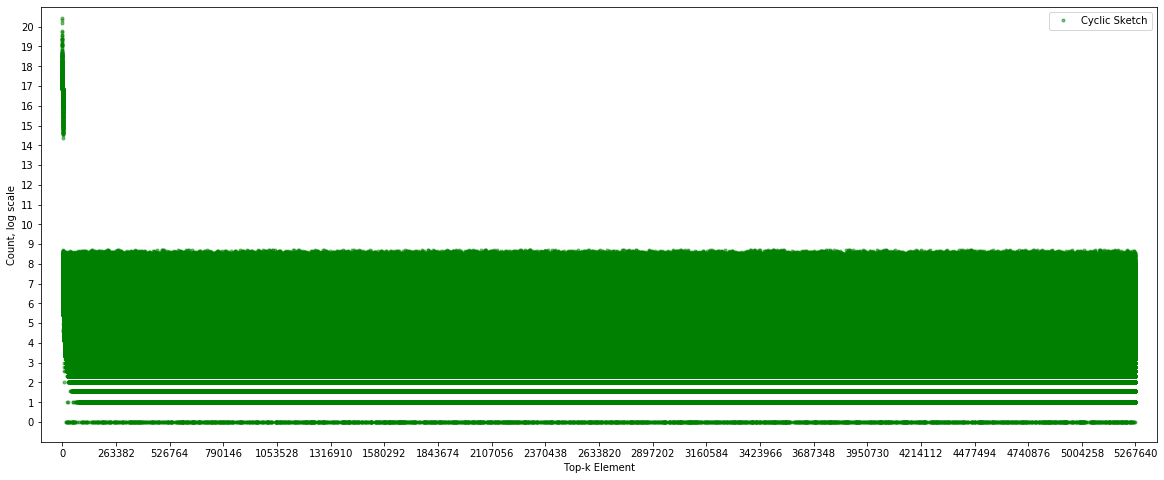

'\nprint(Sk_head)\nmin_ele = min(Top_dict, key=Top_dict.get)\n    # 找dict中的最小key元素\nprint(Top_dict[min_ele])\nfor i in range(len(Sk_head)):\n    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))\n    \n# result to csv\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)\n\n# Top_dict to csv\nfilename=\'CS_Top_\'+str(size)+\'_\'+dataset+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n# Sketch to csv\nfilename=\'CS_Sketch_\'+str(TC.depth)+\'x\'+str(TC.width)+\'_\'+dataset+\'.csv\'\npd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       \n'

In [2]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='webdocs'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=128
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       
'''    